In [1]:
import ROOT

# Standard imports
import numpy as np
import os
import matplotlib.pyplot as plt

# Scikit-HEP packages
import boost_histogram as bh
import aghast
import uproot

Welcome to JupyROOT 6.22/02


### Given two root files (one for data, one for simulation) with histograms with same name inside, print the superimposed plots

In [2]:
histos = {}
histos['data'] = []
histos['mc'] = []

data_file = ROOT.TFile('root_files/tnp/tnp_data.root')
mc_file = ROOT.TFile('root_files/tnp/tnp_mc.root')

var_lims = {
    'probePhoIso03': [-10, 50],
    'probeChIso03worst': [-10, 30],
    'probeChIso03': [-10, 20],
    'probePhoIdMVA': [-1.2, 1.2],
    'probeFull5x5_r9': [-1, 3],
    'probeSigmaIeIe': [-0.005, 0.06],
    'probeCovarianceIeIp': [-0.001, 0.001],
    'probeEtaWidth_Sc': [-0.025, 0.1],
    'probePhiWidth_Sc': [-0.02, 0.3],
    'probeS4': [0, 1.5]
           }

In [3]:
def draw_plot(pkg, var, x_lims = None):
    if x_lims:
        x_min = x_lims[0]
        x_max = x_lims[1]
        
    data_histo = data_file.Get(var)
    mc_histo = mc_file.Get(var)
    try:
        mc_uncorr_histo = mc_file.Get(var + '_uncorr')
    except:
        mc_uncorr_histo = None
        
    if pkg == 'boost':   
        aghast_data_histo = aghast.from_root(data_histo)
        data_data, data_edges = aghast.to_numpy(aghast_data_histo)

        aghast_mc_histo = aghast.from_root(mc_histo)
        mc_data, mc_edges = aghast.to_numpy(aghast_mc_histo)

        fig, axes = plt.subplots()

        boost_data_histo = bh.Histogram(bh.axis.Variable(data_edges[1:-1]))
        boost_data_histo[:] = data_data

        boost_mc_histo = bh.Histogram(bh.axis.Variable(mc_edges[1:-1]))
        boost_mc_histo[:] = mc_data

        if x_lims:
            axes.set_xlim([x_min, x_max])
        plt.title(var)
        plt.xlabel(var)

        plt.bar(boost_data_histo.axes[0].centers, boost_data_histo.view(), width = boost_data_histo.axes[0].widths)
        plt.bar(boost_mc_histo.axes[0].centers, boost_mc_histo.view(), width = boost_mc_histo.axes[0].widths)
        
        if mc_uncorr_histo:
            aghast_mc_uncorr_histo = aghast.from_root(mc_uncorr_histo)
            mc_uncorr_data, mc_uncorr_edges = aghast.to_numpy(aghast_mc_uncorr_histo)
            
            boost_mc_uncorr_histo = bh.Histogram(bh.axis.Variable(mc_uncorr_edges[1:-1]))
            boost_mc_uncorr_histo[:] = mc_uncorr_data
            
            plt.bar(boost_mc_uncorr_histo.axes[0].centers, boost_mc_uncorr_histo.view(), width = boost_mc_uncorr_histo.axes[0].widths)
            
        
    elif pkg == 'root':
        if x_lims:
            for h in data_histo, mc_histo:
                h.SetAxisRange(x_min, x_max)
                
        c = ROOT.TCanvas(var, var)
        
        for h in data_histo, mc_histo:
            h.SetTitle(var)
            h.SetName(var)
            
        data_histo.SetFillColor(4)
        data_histo.SetLineColor(4)
        data_histo.Draw()
        
        mc_histo.SetFillColorAlpha(3, 0.5)
        mc_histo.SetLineColor(3)
        mc_histo.Draw('SAME')
        
        if mc_uncorr_histo:
            mc_uncorr_histo.SetAxisRange(x_min, x_max)
            mc_uncorr_histo.SetTitle(var)
            mc_uncorr_histo.SetName(var)
            mc_uncorr_histo.SetFillColorAlpha(6, 0.3)
            mc_uncorr_histo.SetLineColor(6)
            mc_uncorr_histo.Draw('SAME')
        
        return c
        
    else:
        raise ValueError('Unknown backend package to plot histograms')

#### Plot with ROOT

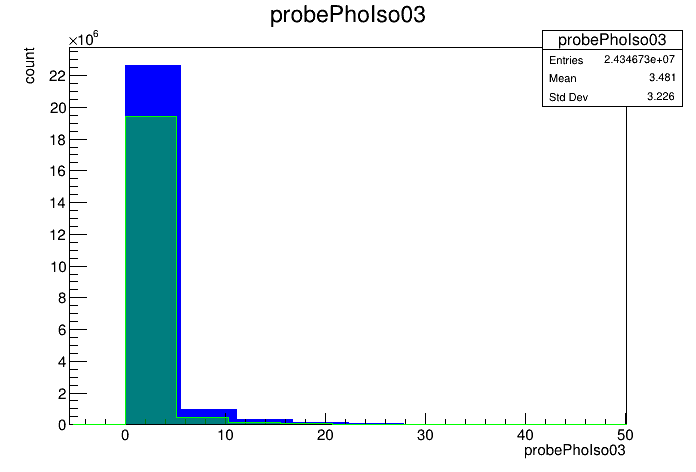

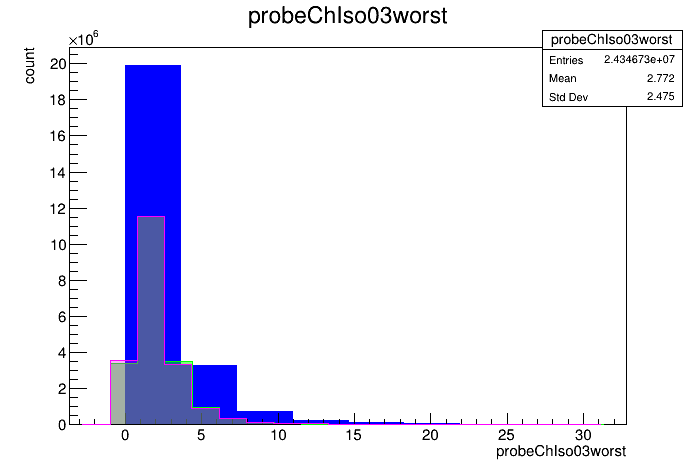

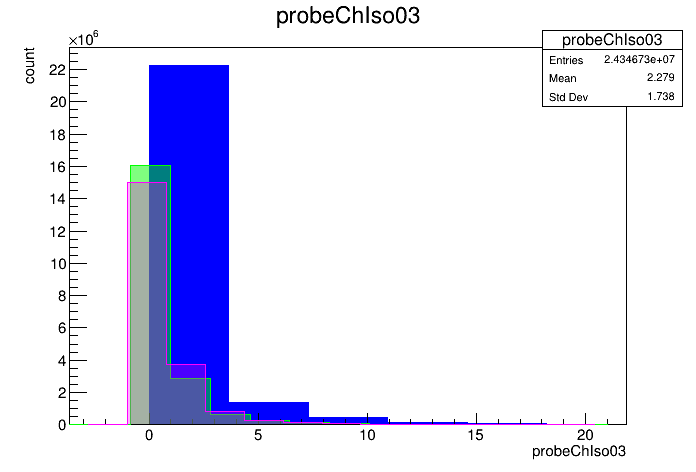

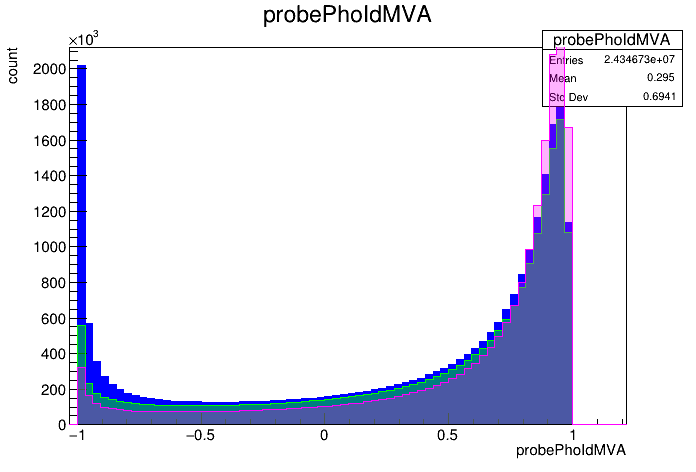

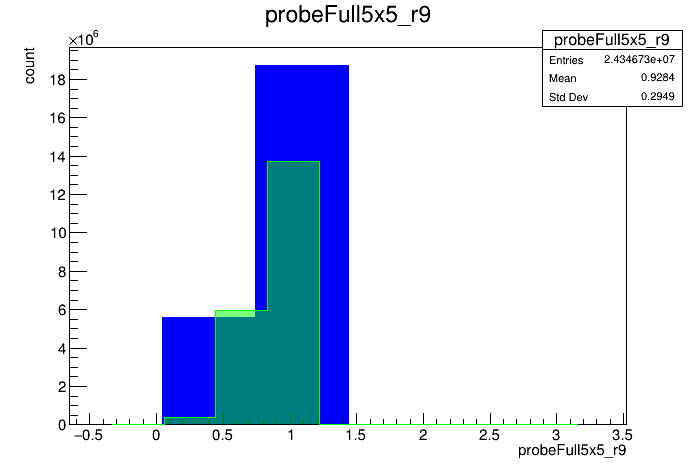

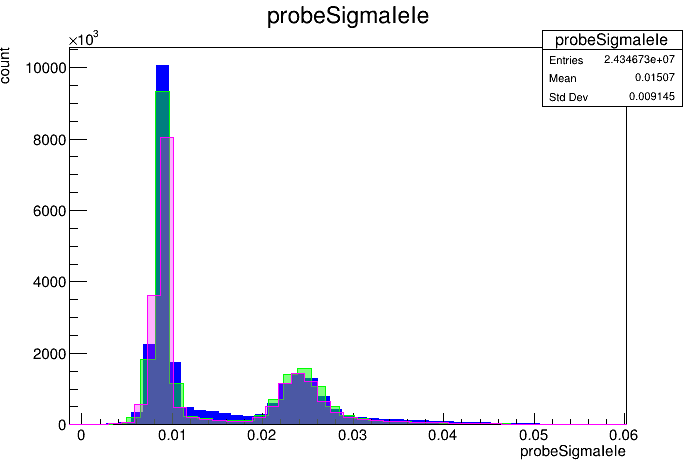

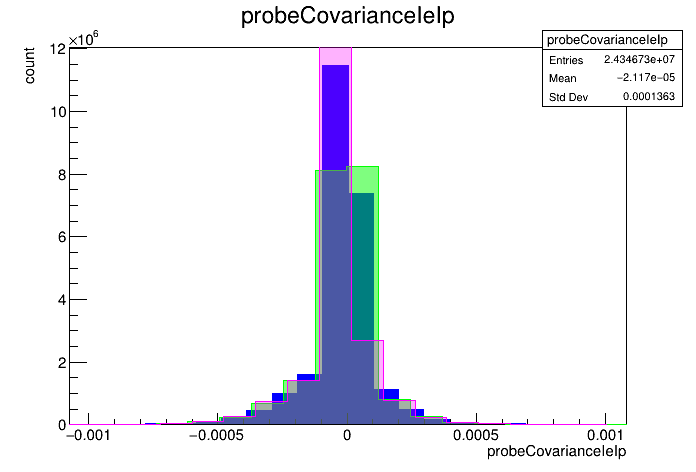

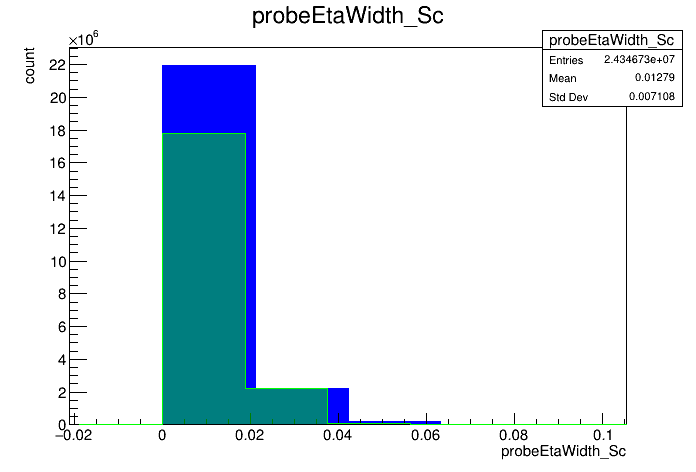

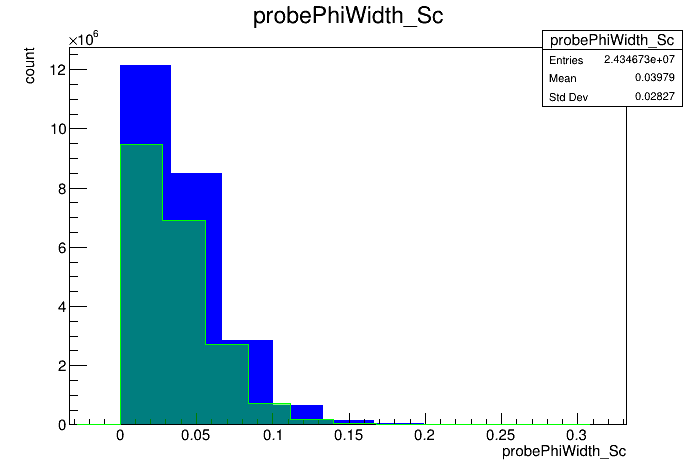

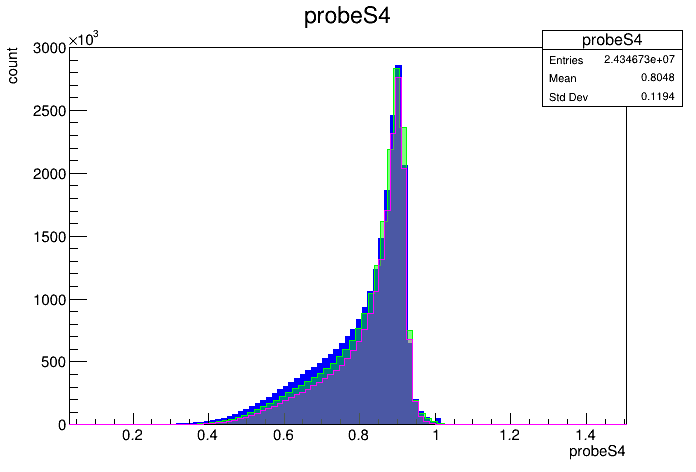

In [4]:
canvases = []

for v, lims in var_lims.items():
    canvases.append(draw_plot('root', v, lims))

for c in canvases:
    c.Draw()

#### Plot with aghast and boost-histogram

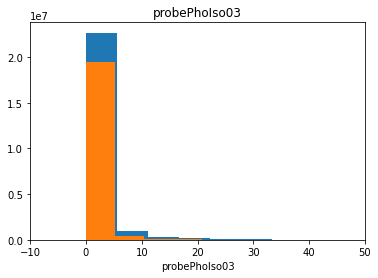

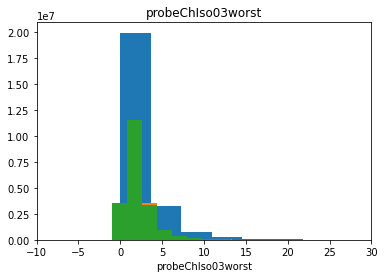

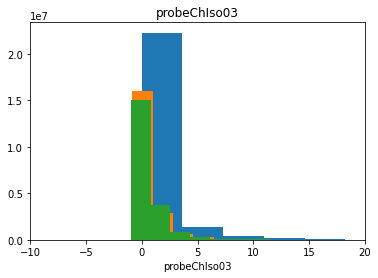

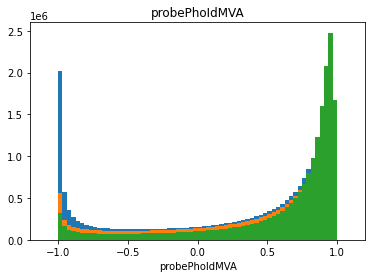

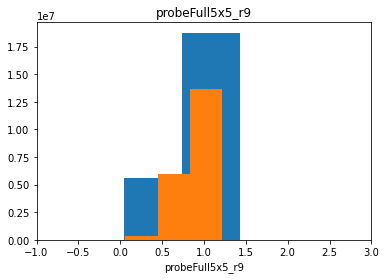

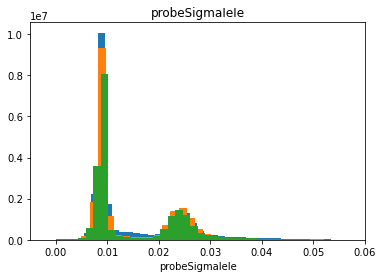

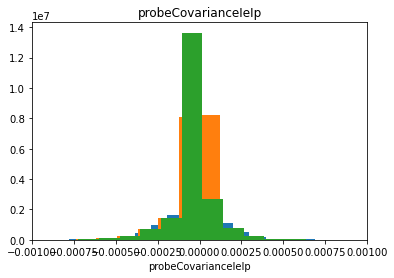

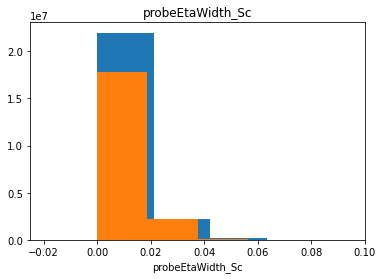

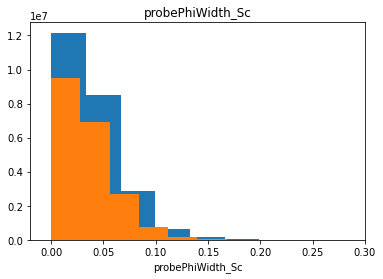

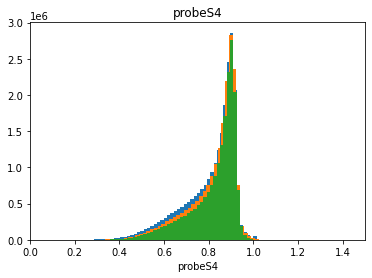

In [5]:
for v, lims in var_lims.items():
    draw_plot('boost', v, lims)